In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# Load Datasets

In [3]:
df_bostonhousing = pd.read_csv('boston_housing.csv')

In [4]:
df_bostonhousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
 ##To check whether there is missing number and the data type for each column
df_bostonhousing.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

We observed that there is no missing data

In [8]:
##From the house data, we expect that the datatype for each column should be either integer or float.
df_bostonhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


As the dataset already contain correct data types, there is no need to change it.

# Data Visualization

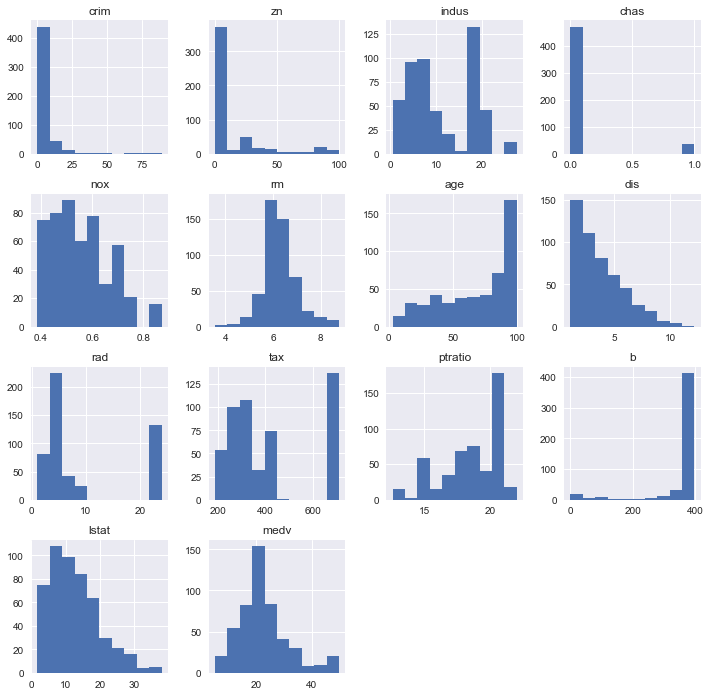

In [19]:
df_bostonhousing.hist(figsize=(12,12));

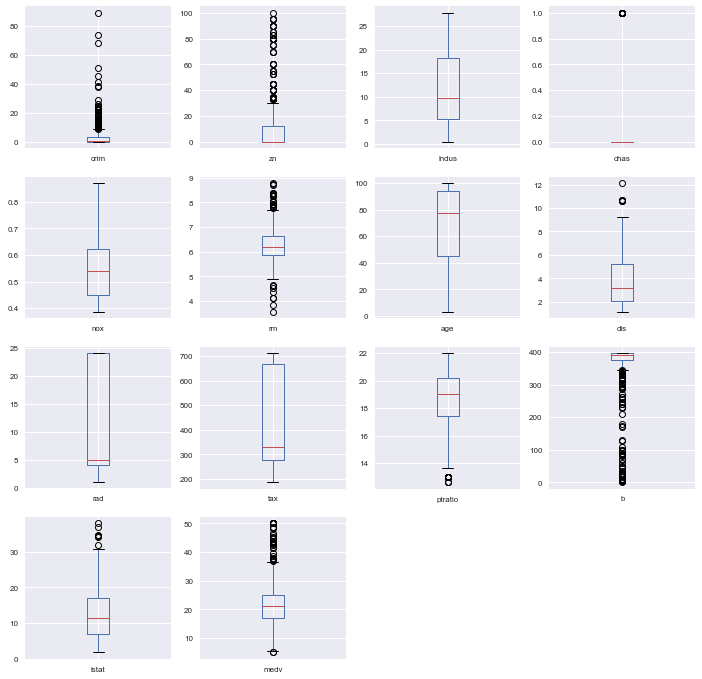

In [21]:
df_bostonhousing.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

/Users/khofiyyamuliarahmi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tax', ylabel='Density'>

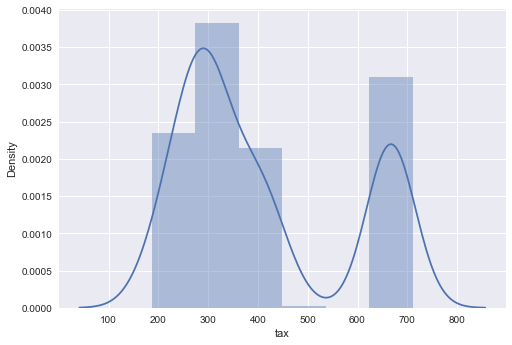

In [19]:
sns.distplot(df_bostonhousing['tax'])

The distribution is slightly skewed to the right, with additional peal appearing at the right most graph

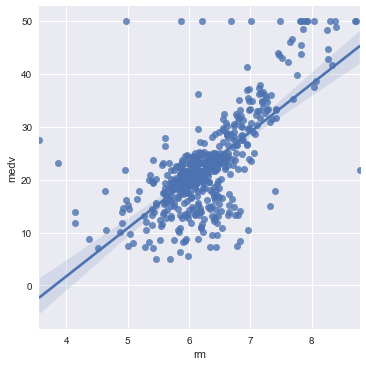

In [11]:
sns.lmplot(data=df_bostonhousing, x='rm', y='medv')

In general, bigger room leads to a higher house cost. Let us see the relation between number of room (RM) with house price (MEDV)

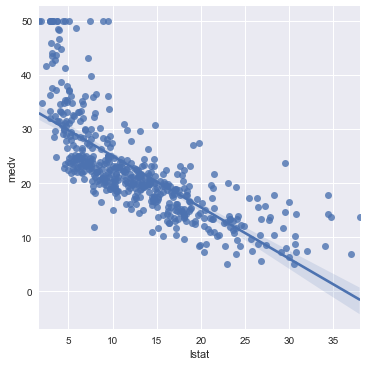

In [13]:
sns.lmplot(data=df_bostonhousing, x='lstat', y='medv')

We see that houses price increases exponentially with increase of LSTAT.It is even more obvious when LSTAT is below 10. It is interesting to see that some people are willing to pay high price to own a house surrounded by owners with higher status, regardless the size of the houses

<AxesSubplot:>

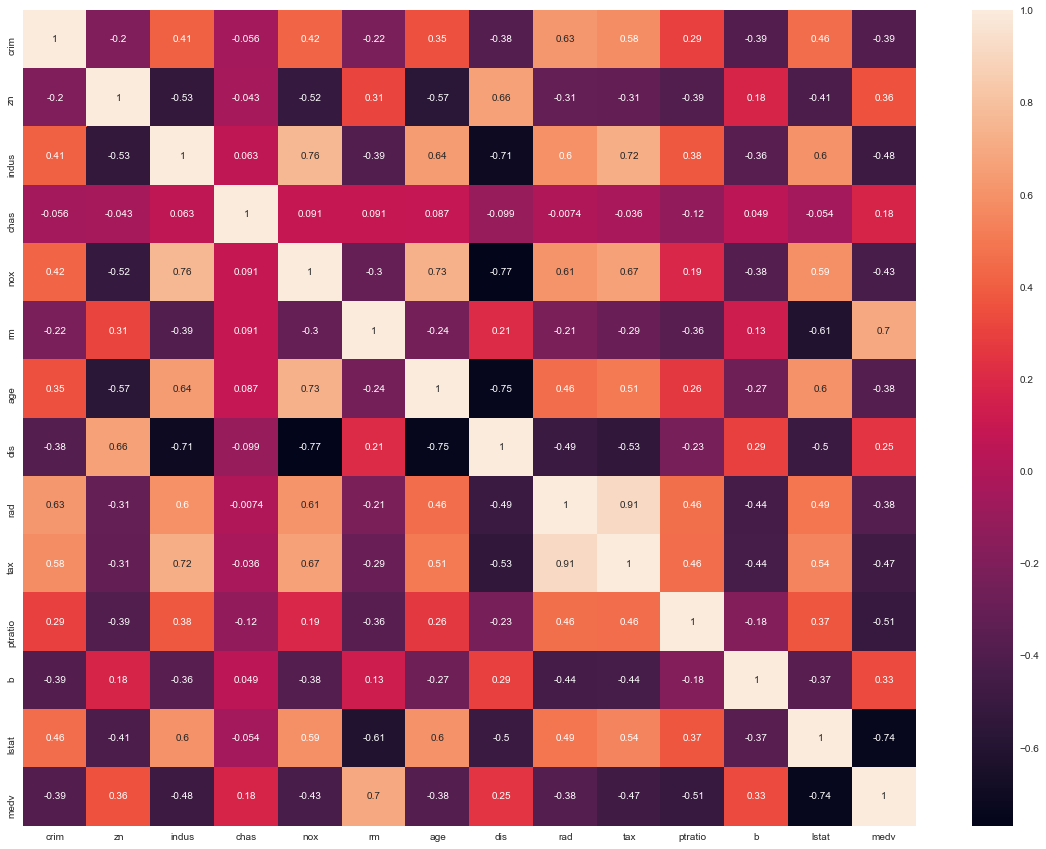

In [14]:
# Let us compare the correlation between each features, especially compared to the price of the house
plt.figure(figsize=(20,15))
sns.heatmap(df_bostonhousing.corr(), annot=True)

We can see that number of room (RM), pupil to teacher ratio(PTRATIO), and percentage of lower status of the population (LSTAT) played the biggest impact to house price (MEDV) compared with other features.

# Data Modeling

In [15]:
# Let start to predict the house price based on existing features. House Price (MEDV) will be dependent variables (y), and the rest of the features are independent variables. 
X = df_bostonhousing.iloc[:,:-1].values
y = df_bostonhousing.iloc[:,-1].values

In [16]:
# The data will also be split into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

As the features value is not significantly different, I will not do standard scaling here. If results shows low accuracy, I will get back and retest it with standard scaler

# Linier Regression

In [17]:
# Let's predict house price with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred_linreg = linreg.predict(X_test)
r2_score(y_test, y_pred_linreg)

0.6135326780735553

the accuracy is decent, but let's see whether we can get a higher score using non-linear regression

# Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(X_train)
polyreg = LinearRegression()
polyreg.fit(X_poly,y_train)
y_pred_poly = polyreg.predict(poly_feat.transform(X_test))
r2_score(y_test, y_pred_poly)

0.8361172724109178

Seems that non-linear regression is more suitable for this dataset. 

# Thank you.....